In [1]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [2]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [3]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/emodb/wav/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name[5]
        if emotion=='W':
          e='anger'
        if emotion=='L':
          e='boredom'
        if emotion=='E':
          e='disgust'
        if emotion=='A':
          e='fear'
        if emotion=='F':
          e='happiness'
        if emotion=='T':
          e='sadness'
        if emotion=='N':
          e='neutral'
        feature=extract_feature(file,mfcc=True,chroma=True,mel=True,zcr=True,rmse=True)
        x.append(feature)
        y.append(e)
    return train_test_split(np.array(x), y, test_size=test_size)

In [4]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00067139  0.00308228  0.00253296 ... -0.00231934 -0.00186157
 -0.00186157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04  9.1552734e-05  3.9672852e-04 ... -9.1552734e-05
 -2.1362305e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -1.5258789e-04 ... -3.9672852e-04
 -4.5776367e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00033569  0.00021362  0.00027466 ... -0.00033569 -0.00033569
 -0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00076294  0.00094604  0.00112915 ... -0.00054932  0.00018311
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 2.3193359e-03 2.3498535e-03
 2.3193359e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.000976

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05 -9.1552734e-05 ...  9.1552734e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05  0.0000000e+00 ... -3.6621094e-04
 -2.7465820e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00021362 -0.00021362 ... -0.00033569 -0.00021362
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00180054 -0.00180054 -0.00189209 ...  0.00601196  0.00576782
  0.00592041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00183105  0.00228882  0.00228882 ... -0.02359009 -0.02404785
 -0.02404785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ...  6.1035156e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00238037 0.00189209 0.00140381 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.04522705 -0.04443359 -0.04403687 ... -0.00234985 -0.00076294
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00335693 0.00350952 0.00335693 ... 0.00030518 0.00030518 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00091553 -0.00091553 -0.00091553

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00094604  0.00143433 -0.00119019 ... -0.00143433 -0.00143433
 -0.0007019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.5258789e-04 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207 -0.00012207 -0.00024414 ... -0.00061035 -0.00048828
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.01168823 -0.01168823 -0.012146   ... -0.00021362 -0.00042725
 -0.00109863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00317383  0.00292969  0.00134277 ... -0.00119019 -0.0010376
 -0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01412964 0.01513672 0.01193237 ... 0.00057983 0.00057983 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00061035  0.00024414  0.  

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -4.2724609e-04 -4.2724609e-04 ...  2.1362305e-04
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.1439209e-01  2.9736328e-01  2.8884888e-01 ...  6.1035156e-04
  1.2207031e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00030518 -0.00064087 ... -0.00097656 -0.00064087
 -0.00195312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00048828 -0.00100708 -0.00048828 ... -0.00100708 -0.00152588
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  2.1362305e-04  6.1035156e-05 ... -4.5776367e-04
 -5.4931641e-04 -4.8828125e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  9.1552734e-05 -3.0517578e-05 ... -5.4931641e-04
 -3.0517578e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00137329 0.003479   0.0020752  ... 0.01907349 0.02001953 0.01956177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-7.9040527e-03 -8.0261230e-03 -8.2397461e-03 ... -9.1552734e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00021362 -0.00045776 ... -0.00045776 -0.00045776
 -0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.6621094

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00210571  0.00531006 -0.00228882 ...  0.         -0.0005188
 -0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00015259  0.         ... -0.00076294 -0.00061035
 -0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.03799438 -0.04031372 -0.03955078 ... -0.00036621 -0.00036621
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00024414 -0.0001220

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00033569  0.0005188   0.00067139 ... -0.00033569 -0.00024414
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00030518  0.          0.         ... -0.00045776  0.
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.01126099  0.0116272   0.0116272  ...  0.00015259  0.00015259
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00021362  0.         -0.00

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.0055542  -0.00592041 -0.00650024 ... -0.00018311 -0.00036621
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00018311  0.00018311 -0.00012207 ...  0.00012207  0.00012207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-04  6.1035156e-05  3.9672852e-04 ...  9.1552734e-05
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -6.1035156e-05
 -3.0517578e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.         -0.00012207 ...  0.00216675 -0.00027466
 -0.0027771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  1.8310547e-04  9.1552734e-05 ... -8.2397461e-04
 -1.2512207e-03 -1.1291504e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  2.1362305e-04 ...  1.2207031e-04
  4.2724609e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.0375977e-03  6.7138672e-04  7.9345703e-04 ...  9.1552734e-05
 -9.1552734e-05 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -1.2207031e-04 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00057983 ...  0.00012207 -0.00042725
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00106812  0.00015259 -0.00183105 ...  0.00045776 -0.00015259
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.01092529 -0.00949097 -0.01504517 ...  0.00805664  0.00839233
  0.00805664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[2.1362305e-04 8.54492

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00015259  0.00064087 -0.00015259 ...  0.00079346  0.00045776
 -0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0005188  -0.00210571 -0.00900269 ... -0.0105896  -0.0105896
 -0.00424194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.2207031e-04 ...  1.2207031e-04
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 8.2

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00018311 -0.00030518 -0.00024414 ...  0.00082397 -0.00030518
 -0.00234985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0007019  0.0012207  0.0012207  ... 0.0010376  0.00094604 0.0012207 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578

In [5]:
x_train.shape,x_test.shape

((428, 182), (107, 182))

In [6]:
#Load the data and extract features for each sound file
def y_check(test_size=0.2):
    y = []
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/emodb/wav/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name[5]
        if emotion=='W':
          e='anger'
        if emotion=='L':
          e='boredom'
        if emotion=='E':
          e='disgust'
        if emotion=='A':
          e='fear'
        if emotion=='F':
          e='happiness'
        if emotion=='T':
          e='sadness'
        if emotion=='N':
          e='neutral'
        y.append(e)
    return y

In [7]:
y = y_check()
df = pd.DataFrame(y, columns =['emo'])
df

,emo
0,happiness
1,neutral
2,anger
3,happiness
4,neutral
...,...
530,boredom
531,sadness
532,sadness
533,anger


In [8]:
y = np.array(y)
y = np.unique(y)
y.sort()
y = list(y)
y

['anger', 'boredom', 'disgust', 'fear', 'happiness', 'neutral', 'sadness']

In [9]:
df.groupby('emo').size()

emo
anger        127
boredom       81
disgust       46
fear          69
happiness     71
neutral       79
sadness       62
dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

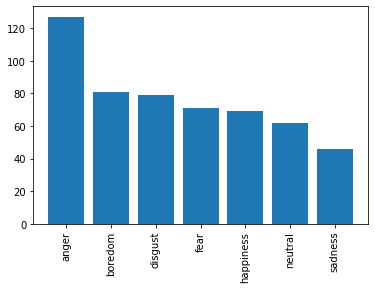

In [10]:
import matplotlib.pyplot as plt
plt.bar(y,df.emo.value_counts())
plt.xticks(rotation=90)

In [11]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [12]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [13]:
# ONE HOT ENCODE THE TARGET
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [14]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]
x_train.shape

(428, 182, 1)

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 173, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 164, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                    

In [16]:
import tensorflow.keras as keras
model_history=model.fit(x_train, y_train,batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
14/14 [==============================] - 7s 60ms/step - loss: 4.7163 - accuracy: 0.1846 - val_loss: 2.5693 - val_accuracy: 0.3551
Epoch 2/100
14/14 [==============================] - 0s 18ms/step - loss: 2.9565 - accuracy: 0.2547 - val_loss: 2.3856 - val_accuracy: 0.5514
Epoch 3/100
14/14 [==============================] - 0s 17ms/step - loss: 2.5834 - accuracy: 0.3505 - val_loss: 2.1975 - val_accuracy: 0.4953
Epoch 4/100
14/14 [==============================] - 0s 16ms/step - loss: 2.4373 - accuracy: 0.4019 - val_loss: 2.0497 - val_accuracy: 0.5047
Epoch 5/100
14/14 [==============================] - 0s 16ms/step - loss: 2.3635 - accuracy: 0.3879 - val_loss: 2.0071 - val_accuracy: 0.5047
Epoch 6/100
14/14 [==============================] - 0s 16ms/step - loss: 2.2746 - accuracy: 0.4019 - val_loss: 1.9417 - val_accuracy: 0.5140
Epoch 7/100
14/14 [==============================] - 0s 15ms/step - loss: 2.1942 - accuracy: 0.4206 - val_loss: 1.9679 - val_accuracy: 0.5327
Epoch 

14/14 [==============================] - 0s 15ms/step - loss: 0.8571 - accuracy: 0.7850 - val_loss: 0.9406 - val_accuracy: 0.7477
Epoch 59/100
14/14 [==============================] - 0s 16ms/step - loss: 0.8099 - accuracy: 0.7757 - val_loss: 1.0369 - val_accuracy: 0.7290
Epoch 60/100
14/14 [==============================] - 0s 17ms/step - loss: 0.7429 - accuracy: 0.7944 - val_loss: 1.0146 - val_accuracy: 0.7383
Epoch 61/100
14/14 [==============================] - 0s 17ms/step - loss: 0.7609 - accuracy: 0.8154 - val_loss: 1.2940 - val_accuracy: 0.6822
Epoch 62/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6654 - accuracy: 0.8458 - val_loss: 1.0062 - val_accuracy: 0.7850
Epoch 63/100
14/14 [==============================] - 0s 17ms/step - loss: 0.7813 - accuracy: 0.7921 - val_loss: 1.0512 - val_accuracy: 0.7477
Epoch 64/100
14/14 [==============================] - 0s 15ms/step - loss: 0.7904 - accuracy: 0.7780 - val_loss: 1.0805 - val_accuracy: 0.7383
Epoch 65/100

In [17]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

4/4 [==============================] - 0s 15ms/step - loss: 1.1324 - accuracy: 0.7103
Loss of the model is -  1.132364273071289
4/4 [==============================] - 0s 14ms/step - loss: 1.1324 - accuracy: 0.7103
Accuracy of the model is -  71.02803587913513 %


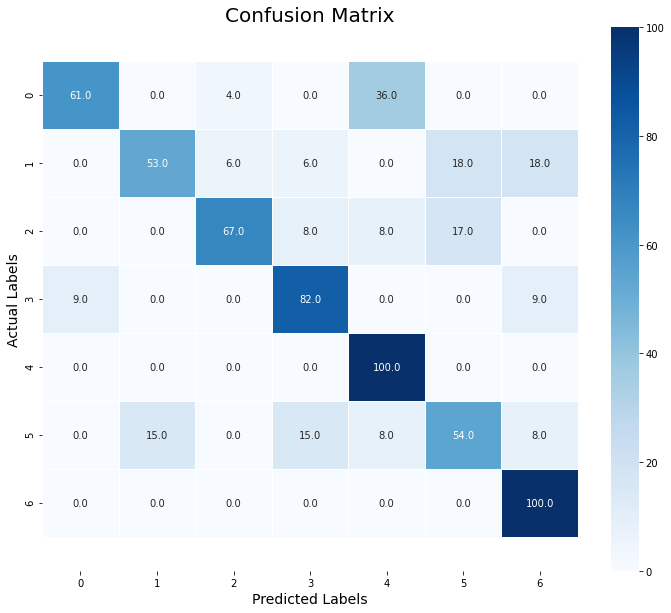

In [19]:
predictions = model.predict(x_test)
predictions = predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
cm = confusion_matrix(actual, predictions,normalize='true')
plt.figure(figsize = (12, 10))
conf_matrix= pd.DataFrame(cm,columns=None)
conf_matrix.to_csv(r'E:\confusion_matrix.csv', index = False, header=False)
ax = sns.heatmap(np.round(cm*100), linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [20]:
print(classification_report(actual, predictions, target_names = ['anger','boredom','disgust','fear','happiness','neutral','sadness']))

              precision    recall  f1-score   support

       anger       0.94      0.61      0.74        28
     boredom       0.82      0.53      0.64        17
     disgust       0.80      0.67      0.73        12
        fear       0.69      0.82      0.75        11
   happiness       0.37      1.00      0.54         7
     neutral       0.58      0.54      0.56        13
     sadness       0.79      1.00      0.88        19

    accuracy                           0.71       107
   macro avg       0.71      0.74      0.69       107
weighted avg       0.77      0.71      0.71       107



In [22]:
cm =cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([ 60.71428571,  52.94117647,  66.66666667,  81.81818182,
       100.        ,  53.84615385, 100.        ])

Text(0.5, 1.0, 'accuracy of each class')

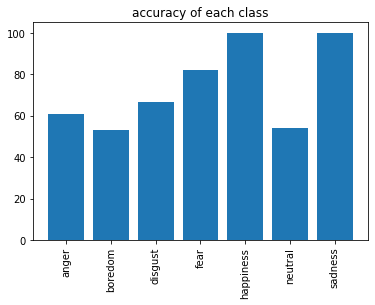

In [23]:
plt.bar(y,cm.diagonal()*100)
plt.xticks(rotation=90)
plt.title("accuracy of each class")

In [ ]:
from imblearn.metrics import specificity_score
s=specificity_score(actual,predictions,average='macro')
print(s)

0.9560874853866117


In [ ]:
from sklearn.metrics import roc_auc_score
y_score=model.predict(x_test)
auc=roc_auc_score(y_test, y_score, average='macro',multi_class='ovo')
print(auc)

0.9079099078994622


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
p=precision_score(actual,predictions,average='macro')
r=recall_score(actual,predictions,average='macro')
f=f1_score(actual,predictions,average='macro')
print(p,r,f)

0.7150488400488401 0.7533987837559266 0.7193554284735962


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(TPR)
print(FPR)

[0.74285714 0.55555556 0.83333333 0.6875     0.72727273 0.72727273
 1.        ]
[0.         0.04545455 0.01041667 0.07349687 0.06111111 0.03819444
 0.05902778]


In [ ]:
l=[]
for i in range(100):
  l.append(i+1)

In [ ]:
from pandas import DataFrame
C = {'epoch no':l,
    'acc train':model_history.history['accuracy'],
    'acc val':model_history.history['val_accuracy'],
    'loss train':model_history.history['loss'],
    'loss val':model_history.history['val_loss']}
df = DataFrame(C, columns= ['epoch no','acc train','acc val','loss train','loss val'])
export_csv = df.to_csv (r'E:\result1.csv', index = None, header=True) 
print (df)

    epoch no  acc train   acc val  loss train  loss val
0          1   0.172897  0.345794    4.987357  2.651602
1          2   0.273364  0.420561    2.935440  2.391357
2          3   0.306075  0.467290    2.588524  2.216855
3          4   0.371495  0.476636    2.417942  2.079623
4          5   0.399533  0.514019    2.343622  1.996581
..       ...        ...       ...         ...       ...
95        96   0.841121  0.691589    0.703389  1.194717
96        97   0.852804  0.738318    0.562986  1.064500
97        98   0.887850  0.766355    0.521043  1.040353
98        99   0.864486  0.794393    0.553416  1.108786
99       100   0.878505  0.728972    0.520604  1.198884

[100 rows x 5 columns]


In [ ]:
from pandas import DataFrame
C = {
     'train acc':[str(model_history.history['accuracy'][99])],
     'test acc':[str(model_history.history['val_accuracy'][99])],
     'precision(macro)':[str(p)],
     'recall(macro)':[str(r)],
     'f1(macro)':[str(f)],
     'specificity(macro)':[str(s)],
     'AUC(macro)':[str(auc)],
     'train time per epoch':['1 sec'],
     'test time per epoch':['1 sec'],}
df = DataFrame(C, columns= ['train acc','test acc','precision(macro)','recall(macro)','f1(macro)','specificity(macro)','AUC(macro)','train time per epoch','test time per epoch'])
export_csv = df.to_csv (r'E:\result2.csv', index = None, header=True) 
print (df)

            train acc  ... test time per epoch
0  0.8785046935081482  ...               1 sec

[1 rows x 9 columns]


In [ ]:
from pandas import DataFrame
C = {
     'TPR': TPR,
     'FPR': FPR}
df = DataFrame(C, columns= ['TPR','FPR'])
export_csv = df.to_csv (r'E:\result3.csv', index = None, header=True) 
print (df)

        TPR       FPR
0  0.742857  0.000000
1  0.555556  0.045455
2  0.833333  0.010417
3  0.687500  0.073497
4  0.727273  0.061111
5  0.727273  0.038194
6  1.000000  0.059028
